In [1]:
#importing Importent Libraries

#Data Handeling

import pandas as pd 
import numpy as np 


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing

import nltk
import string
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize

#Machine Learning Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Model Evaluation

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix 

# importing dataset

In [2]:
import warnings 
warnings.filterwarnings("ignore")
data_set = pd.read_csv("spam_ham_dataset.csv")

data_set = data_set.drop("Unnamed: 0" , axis = 1)

data_set = data_set.rename({"label_num":"class" }, axis = 1)

data_set.columns = ["label","text","class"]

# Data set Visualization

In [3]:
data_set.drop_duplicates(inplace=True)

data_set.shape

(4993, 3)

<AxesSubplot:xlabel='label', ylabel='count'>

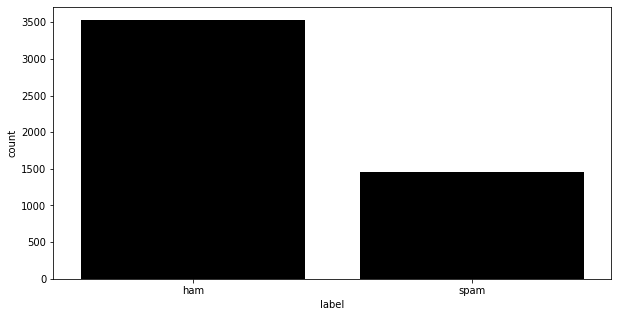

In [4]:
plt.figure(figsize = (10,5))
sns.countplot(data = data_set ,x = "label",color="black")

In [5]:
for a in data_set.iterrows():
    print(f"Class Label: {a[1][0]}\n Mail: \n{a[1][1]}\n\n")
    if a[0] == 5: break

Class Label: ham
 Mail: 
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


Class Label: ham
 Mail: 
Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls


Class Label: ham
 Mail: 
Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 -

# Text Preprocessing

In [23]:
def clean_text(text):
    
    remove_punc = [char for char in text if char not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    
    remove_stopwords = [word for word in remove_punc.split() if word.lower not in stopwords.words("english")]
   
    return remove_stopwords

data_set.text.apply(clean_text)

In [24]:
data_set.text.apply(clean_text)

0       [Subject, enron, methanol, meter, 988291, foll...
1       [Subject, hpl, nom, january, 9, 2001, see, att...
2       [Subject, neon, retreat, ho, ho, ho, around, w...
3       [Subject, photoshop, windows, office, cheap, m...
4       [Subject, indian, springs, deal, book, teco, p...
                              ...                        
5165    [Subject, fw, crosstex, energy, driscoll, ranc...
5166    [Subject, put, 10, ft, transport, volumes, dec...
5167    [Subject, 3, 4, 2000, following, noms, hpl, ta...
5169    [Subject, industrial, worksheets, august, 2000...
5170    [Subject, important, online, banking, alert, d...
Name: text, Length: 4993, dtype: object

In [25]:
data_set.text.head()

0    Subject : enron methanol ; meter # : 988291 fo...
1    Subject : hpl nom january 9 , 2001 ( see attac...
2    Subject : neon retreat ho ho ho , ' around won...
3    Subject : photoshop , windows , office . cheap...
4    Subject : : indian springs deal book teco pvr ...
Name: text, dtype: object

# Separate data_set

In [26]:
x = data_set.loc[:, 'text']
y = data_set.loc[:, 'class']

print(f"Shape of X is = {x.shape}\nShape of Y is = {y.shape}")

Shape of X is = (4993,)
Shape of Y is = (4993,)


# Split data into train and test in 70:30

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.30 , random_state = 1)

print(f"Shape of Traing Data = {xtrain.shape} \nShape of Testing Data = {xtest.shape}")

Shape of Traing Data = (3495,) 
Shape of Testing Data = (1498,)


# Feature Extaction using TfidfVectorizer

In [28]:
tfIdf = TfidfVectorizer(analyzer=clean_text).fit(xtrain)

print('NO.of Tokens: ',len(tfIdf.vocabulary_.keys()))


NO.of Tokens:  39871


In [29]:
tfIDF = tfIdf.transform(xtrain)
type(tfIDF)

scipy.sparse._csr.csr_matrix

In [30]:
print(f"Number of Observations: {tfIDF.shape[0]}\nTokens/Features: {tfIDF.shape[1]}")

Number of Observations: 3495
Tokens/Features: 39871



# Hyper parameter tuning

In [31]:
lr = LogisticRegression(verbose=1)

grid={"C":[float(i) for i in range(1, 3)], "penalty":["l2"], "solver":[ 'lbfgs', 'liblinear']}
logreg_cv=GridSearchCV(lr, grid, cv=4)
logreg_cv.fit(tfIDF,ytrain)

print("Tuned Hpyerparameters :",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81674D+03    |proj g|=  5.30500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     33     36      1     0     0   1.090D-02   6.896D+02
  F =   689.57497721339246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81674D+03    |proj g|=  5.30500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     38     42      1     0     0   3.061D-02   6.980D+02
  F =   698.04959477689260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.8

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     35     38      1     0     0   6.432D-04   6.959D+02
  F =   695.92542579081487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81743D+03    |proj g|=  5.31000D+02


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     22     24      1     0     0   2.564D-03   6.935D+02
  F =   693.46605104284049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[LibLinear]iter  1 act 8.067e+02 pre 6.893e+02 delta 1.034e+01 f 1.817e+03 |g| 5.593e+02 CG   2
cg reaches trust region boundary
iter  2 act 2.875e+02 pre 2.559e+02 delta 1.249e+01 f 1.010e+03 |g| 1.601e+02 CG   3
iter  3 act 3.011e+01 pre 2.845e+01 delta 1.249e+01 f 7.225e+02 |g| 5.457e+01 CG   2
iter  4 act 2.795e+00 pre 2.803e+00 delta 1.249e+01 f 6.924e+02 |g| 9.233e+00 CG   3
iter  5 act 1.497e-02 pre 1.496e-02 del

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     37     41      1     0     0   7.895D-04   5.266D+02
  F =   526.55078165976147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81674D+03    |proj g|=  5.30500D+02


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     34     39      1     0     0   6.187D-04   5.335D+02
  F =   533.52503153246482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81674D+03    |proj g|=  5.30500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     44     49      1     0     0   1.599D-03   5.292D+02
  F =   529.22005101431716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[LibLinear]iter  1 act 2.062e+03 pre 1.801e+03 delta 1.665e+01 f 3.633e+03 |g| 1.119e+03 CG   3
iter  2 act 4.342e+02 pre 3.683e+02 delta 1.665e+01 f 1.571e+03 |g| 3.343e+02 CG   3
iter  3 act 7.531e+01 pre 6.876e+01 delta 1.665e+01 f 1.137e+03 |g| 1.161e+02 CG   3
iter  4 act 6.897e+00 pre 5.839e+00 delta 1.665e+01 f 1.062e+03 |g| 2.398e+01 CG   2
iter  5 act 1.786e+00 pre 1.763e+00 delta 1.665e+01 f 1.055e+03 |g| 4.19

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        39872     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42255D+03    |proj g|=  7.07500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
39872     44     50      1     0     0   2.680D-03   6.421D+02
  F =   642.14484076891563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Tuned Hpyerparameters : {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9879820105320825


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [32]:
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(tfIDF, ytrain)

LogisticRegression(solver='liblinear')

# Model Evaluate on the Test data


In [33]:
test_tfIDF = tfIdf.transform(xtest)
test_tfIDF = test_tfIDF.toarray()
print(f"Number of Observations: {test_tfIDF.shape[0]}\nTokens/Features: {test_tfIDF.shape[1]}")

Number of Observations: 1498
Tokens/Features: 39871


In [34]:
prediction = lr.predict(test_tfIDF)

In [35]:
print(f"Accuracy = {accuracy_score(ytest, prediction) * 100}")

Accuracy = 98.5981308411215


In [36]:
# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1076
           1       0.96      1.00      0.98       422

    accuracy                           0.99      1498
   macro avg       0.98      0.99      0.98      1498
weighted avg       0.99      0.99      0.99      1498



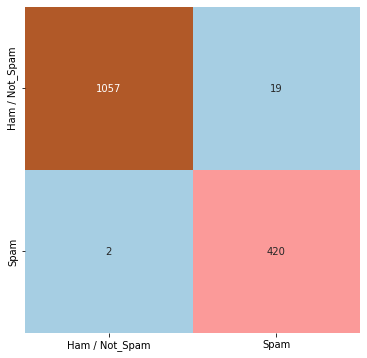

In [37]:
cmat = confusion_matrix(ytest, prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham / Not_Spam', 'Spam'], yticklabels=['Ham / Not_Spam', 'Spam']);

# 😀Start Prediction😉

In [40]:
# 'You won 1000$ prize money in lottery. Click here to avail'
cVect = CountVectorizer()
def predict_class(lr):
    text = input('Enter Text(Subject of the mail): ')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    tf_idf = tfIdf.fit_transform(text).toarray()
    print('Predicted Class:', end = ' ')
    print('Spam' if lr.predict(tf_idf)[0] else 'Not Spam') 
    prob = lr.predict_proba(tf_idf)*100
    print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Not Spam', 'Spam'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()

In [ ]:
predict_class(lr)